In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import regex as re
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from wordcloud import WordCloud

In [ ]:
# input and output dir for load and save data
input_dir = '/content/drive/My Drive/Colab Notebooks/Suicide and Depression/data/input/'
output_dir = '/content/drive/My Drive/Colab Notebooks/Suicide and Depression/data/output/'
#load Data
data=pd.read_csv(output_dir+'final_data_medium.csv')
data.head()

,date,subreddit,text
0,2022/12/23,1,regret i committed suicide back in may and i ...
1,2022/12/23,0,ok the medication is working what do i do no...
2,2022/12/29,0,venting hate my life idk how many people are ...
3,2022/12/12,1,i am the problem in all of my issues if i have...
4,2022/12/09,0,living to survive too apprehensive about the ...


In [ ]:
 #get frequency of the words in text column
word_freq=pd.DataFrame(data['text'].str.split(expand=True).stack().value_counts()).head(25)
word_freq.columns=['Word Count']
word_freq.head(10)

,Word Count
i,198885
to,84996
and,75160
my,54137
the,50281
a,45765
it,41518
t,38541
of,34324
me,34302


In [ ]:
#Apply nltk.corpus stop words to text
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#Function to bar plot to 25 words in the given dataframe column
def word_freq(df,title_text='',x_label='',y_label=''):
    word_freq=pd.DataFrame(df.str.split(expand=True).stack().value_counts()).head(25)
    word_freq.columns=['Word Count']
    fig, ax = plt.subplots(figsize=(20,7))
    sns.barplot(x=word_freq.index,y=word_freq['Word Count'],ax=ax);
    ax.set_xlabel(x_label,fontsize=16)
    ax.set_ylabel(y_label,fontsize=16)
    ax.set_title(title_text,fontsize=16)

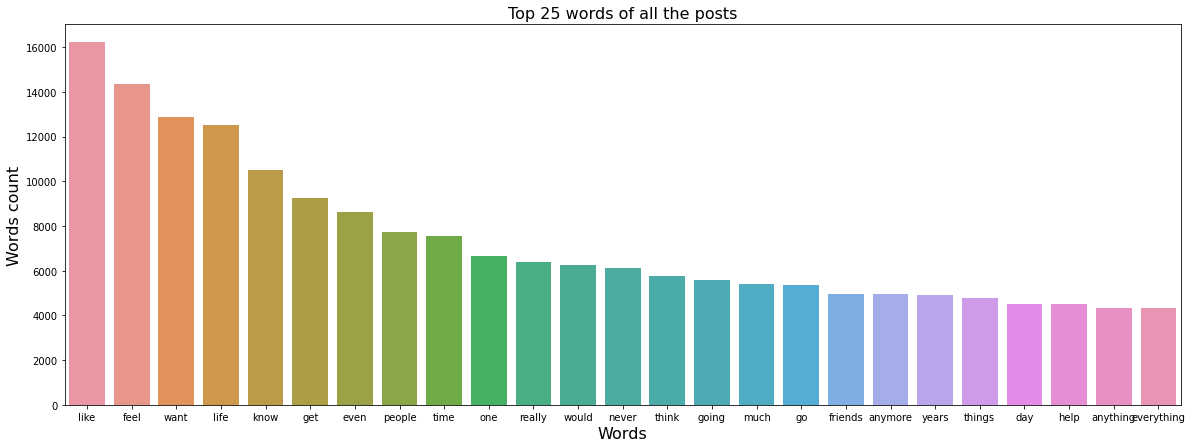

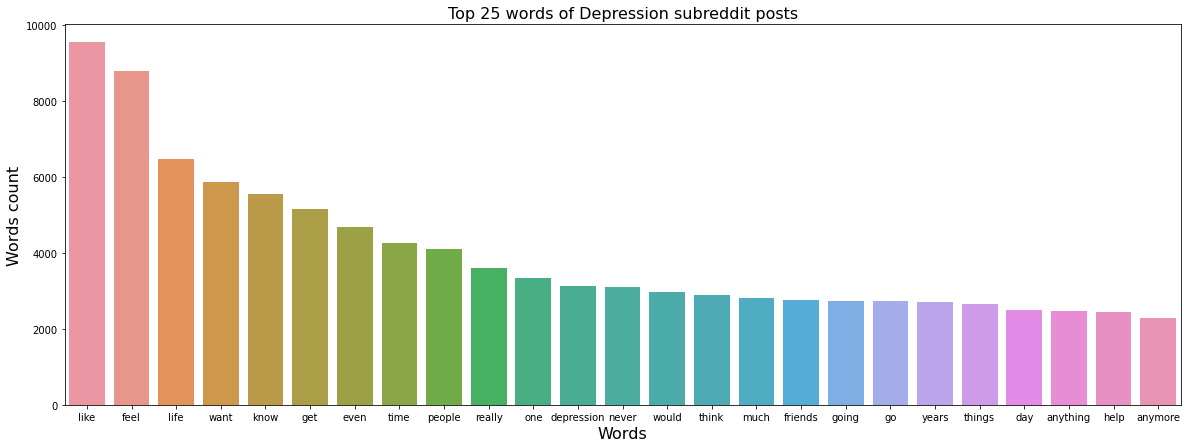

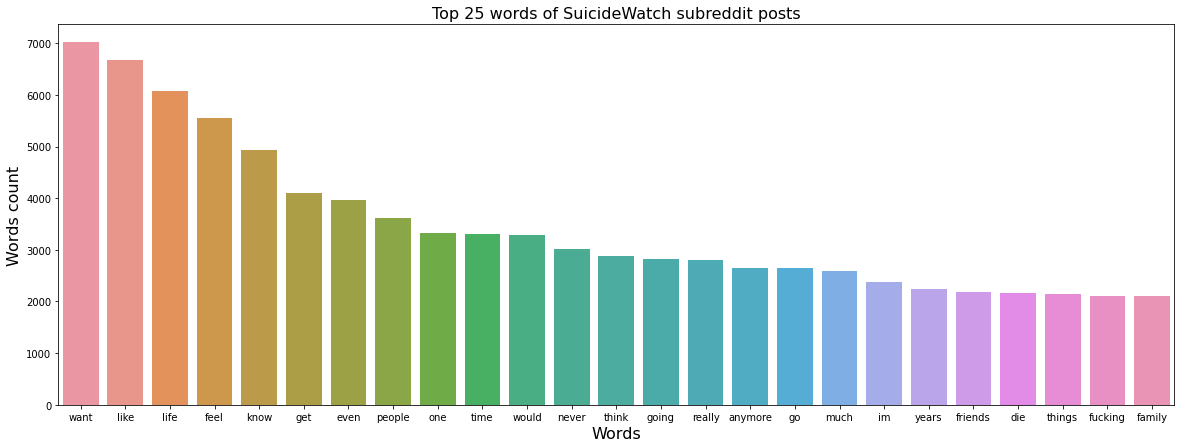

In [ ]:
word_freq(data['text'],title_text='Top 25 words of all the posts',x_label='Words',y_label='Words count')
tempdf=pd.DataFrame(data['text'][data['subreddit'] == 0])
word_freq(tempdf['text'],title_text='Top 25 words of Depression subreddit posts',x_label='Words',y_label='Words count')
tempdf=pd.DataFrame(data['text'][data['subreddit'] == 1])
word_freq(tempdf['text'],title_text='Top 25 words of SuicideWatch subreddit posts',x_label='Words',y_label='Words count')

**Lemmatization and Stemming

In [ ]:
#lemmatize text to new column 'text_lemma'
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
def lemmatize(text):
    lemmatizer = nltk.WordNetLemmatizer()
    tokenizer = RegexpTokenizer(r'\w+')
    return [lemmatizer.lemmatize(w) for w in tokenizer.tokenize(text)]

data['text_lemma'] = data.text.apply(lemmatize)
data['text_lemma']= data['text_lemma'].str.join(' ')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


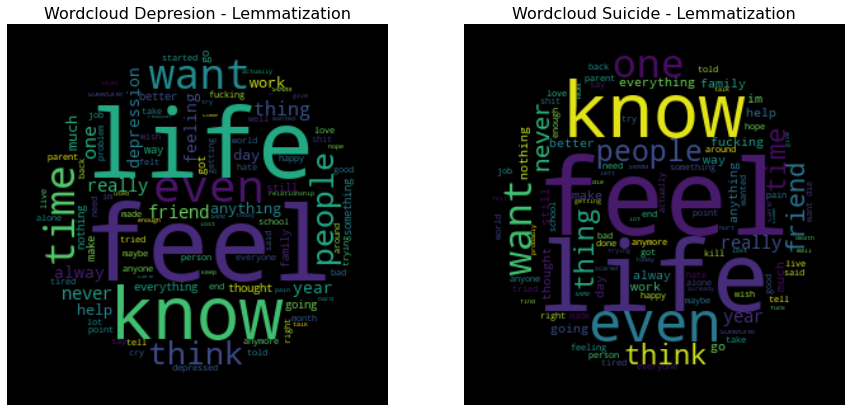

In [ ]:
#Wordcloud visualisation
def wordcloud_graph(newdata, label, color):
  x, y = np.ogrid[:300, :300]
  mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
  mask = 255 * mask.astype(int)
  wc1 = WordCloud(max_words=100,background_color=coloß¢¢r, mask=mask).generate(' '.join(newdata[data['subreddit'] == 0]))
  wc2 = WordCloud(max_words=100,background_color=color, mask=mask).generate(' '.join(newdata[data['subreddit'] == 1]))
  fig, axs = plt.subplots(1, 2, figsize=(15, 15))
  axs[0].imshow(wc1, interpolation='bilinear')
  axs[1].imshow(wc2, interpolation='bilinear')
  axs[0].axis("off")
  axs[1].axis("off")
  axs[0].set_title(f'Wordcloud Depresion - {label}', fontsize=16)
  axs[1].set_title(f'Wordcloud Suicide - {label}', fontsize=16)
  plt.show()

wordcloud_graph(data['text_lemma'], 'Lemmatization' , 'Black')

Stemming

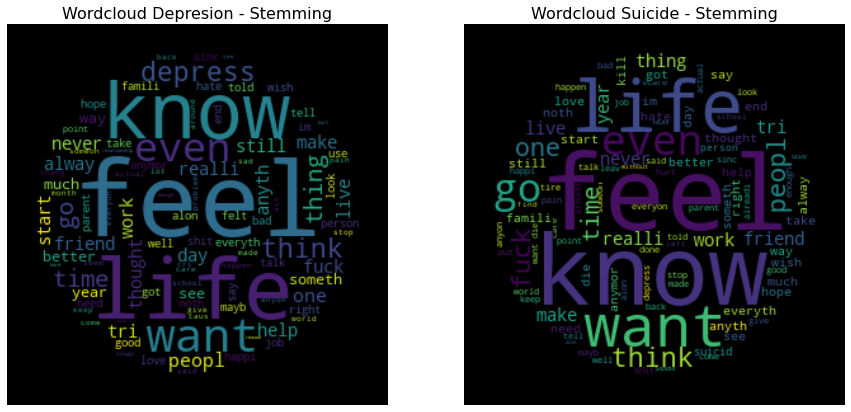

In [ ]:
#Stemming text to new column 'text_stem'
def Stemming(text):
    stemming = nltk.PorterStemmer()
    tokenizer = RegexpTokenizer(r'\w+')
    return [stemming.stem(w) for w in tokenizer.tokenize(text)]

data['text_stem'] = data.text.apply(Stemming)
data['text_stem']= data['text_stem'].str.join(' ')

wordcloud_graph(data['text_stem'], 'Stemming', 'black')

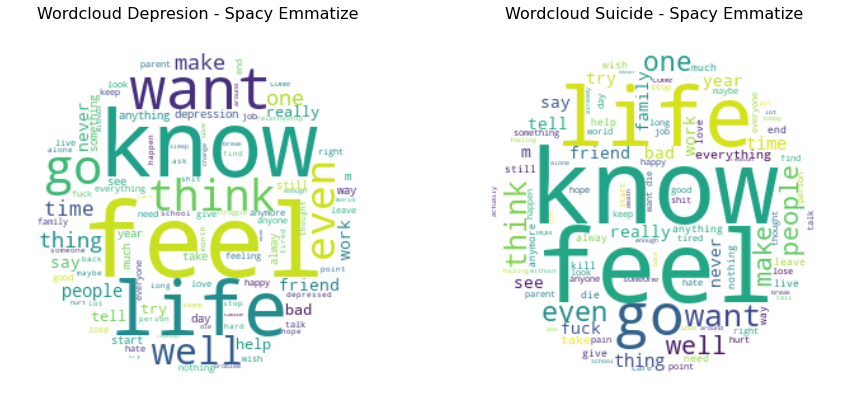

In [ ]:
#spacy text to new column 'text_spacy'
import spacy
nlp = spacy.load("en_core_web_sm")
def lemmatizer(text):        
    sent = []
    doc = nlp(text)
    for word in doc:
        sent.append(word.lemma_)
    return " ".join(sent)

data['text_spacy'] =  data.apply(lambda x: lemmatizer(x['text']), axis=1)
data['text_spacy'] = data['text_spacy'].replace(to_replace=r'-PRON-', value=' ', regex=True)

wordcloud_graph(data['text_spacy'], 'Spacy Emmatize', 'white')


In [ ]:
data.head()

,date,subreddit,text,text_lemma,text_stem,text_spacy
0,2022/12/23,1,regret committed suicide back may regret allow...,regret committed suicide back may regret allow...,regret commit suicid back may regret allow pil...,regret commit suicide back may regret allow pi...
1,2022/12/23,0,ok medication working damage life depression l...,ok medication working damage life depression l...,ok medic work damag life depress lost friend b...,ok medication working damage life depression l...
2,2022/12/29,0,venting hate life idk many people going see go...,venting hate life idk many people going see go...,vent hate life idk mani peopl go see go alway ...,venting hate life idk many people go see go al...
3,2022/12/12,1,problem issues nothing live want kill justifia...,problem issue nothing live want kill justifiab...,problem issu noth live want kill justifi reaso...,problem issue nothing live want kill justifiab...
4,2022/12/09,0,living survive apprehensive realm hereafter th...,living survive apprehensive realm hereafter th...,live surviv apprehens realm hereaft thing keep...,live survive apprehensive realm hereaft thing ...


In [ ]:
data.to_csv(output_dir+'final_data_processed.csv',index=False)

In [ ]:
import nltk
def pre(data):  
  processed=[]
  for i in data:
    processed.append(nltk.word_tokenize(str(i)))
  return processed

data["pre_text"]=pre(data['text'])
data["pre_text_lemma"]=pre(data['text_lemma'])
data["pre_text_stem"]=pre(data['text_stem'])
data["pre_text_spacy"]=pre(data['text_spacy'])



In [ ]:
data.head()

,date,subreddit,text,text_lemma,text_stem,text_spacy,pre_text,pre_text_lemma,pre_text_stem,pre_text_spacy
0,2022/12/23,1,regret committed suicide back may regret allow...,regret committed suicide back may regret allow...,regret commit suicid back may regret allow pil...,regret commit suicide back may regret allow pi...,"[regret, committed, suicide, back, may, regret...","[regret, committed, suicide, back, may, regret...","[regret, commit, suicid, back, may, regret, al...","[regret, commit, suicide, back, may, regret, a..."
1,2022/12/23,0,ok medication working damage life depression l...,ok medication working damage life depression l...,ok medic work damag life depress lost friend b...,ok medication working damage life depression l...,"[ok, medication, working, damage, life, depres...","[ok, medication, working, damage, life, depres...","[ok, medic, work, damag, life, depress, lost, ...","[ok, medication, working, damage, life, depres..."
2,2022/12/29,0,venting hate life idk many people going see go...,venting hate life idk many people going see go...,vent hate life idk mani peopl go see go alway ...,venting hate life idk many people go see go al...,"[venting, hate, life, idk, many, people, going...","[venting, hate, life, idk, many, people, going...","[vent, hate, life, idk, mani, peopl, go, see, ...","[venting, hate, life, idk, many, people, go, s..."
3,2022/12/12,1,problem issues nothing live want kill justifia...,problem issue nothing live want kill justifiab...,problem issu noth live want kill justifi reaso...,problem issue nothing live want kill justifiab...,"[problem, issues, nothing, live, want, kill, j...","[problem, issue, nothing, live, want, kill, ju...","[problem, issu, noth, live, want, kill, justif...","[problem, issue, nothing, live, want, kill, ju..."
4,2022/12/09,0,living survive apprehensive realm hereafter th...,living survive apprehensive realm hereafter th...,live surviv apprehens realm hereaft thing keep...,live survive apprehensive realm hereaft thing ...,"[living, survive, apprehensive, realm, hereaft...","[living, survive, apprehensive, realm, hereaft...","[live, surviv, apprehens, realm, hereaft, thin...","[live, survive, apprehensive, realm, hereaft, ..."


In [ ]:
data.to_csv(output_dir+'final_data_processed_pre.csv',index=False)